# Squash Phase Space
### Calculate trajectory of squash ball in 2D space

### units are meters, grams

resilience should be between 26 and 33%

mass should be between 23 and 25 grams

average serve velocity 44.7 meters / sec

In [87]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

%matplotlib notebook

def calc_zbounce(xyz_ball, vel_ball, size = 1):
    '''
    calculate positions and velocities after zbounce in unit square
    '''
    
    zbounce = False
    
    if xyz_ball[0] <= 0:
#         print('zbounce')
        xyz_ball[0] = np.fabs(xyz_ball[0])
        vel_ball[0] = - resilience * vel_ball[0]
        vel_ball[1] = resilience * vel_ball[1]
        vel_ball[2] = resilience * vel_ball[2]
        
    elif xyz_ball[0] >= size:
#         print('zbounce')
        xyz_ball[0] = 1 - (xyz_ball[0] % 1.0)
        vel_ball[0] = - resilience * vel_ball[0]
        vel_ball[1] = resilience * vel_ball[1]
        vel_ball[2] = resilience * vel_ball[2]
        
    if xyz_ball[1] <= 0:
#         print('zbounce')
        xyz_ball[1] = np.fabs(xyz_ball[1])        
        vel_ball[0] = resilience * vel_ball[0]
        vel_ball[1] = - resilience * vel_ball[1]
        vel_ball[2] = resilience * vel_ball[2]
        
    elif xyz_ball[1] >= size:
#         print('zbounce')
        xyz_ball[1] = 1 - (xyz_ball[1] % 1.0)        
        vel_ball[0] = resilience * vel_ball[0]
        vel_ball[1] = - resilience * vel_ball[1]
        vel_ball[2] = resilience * vel_ball[2]
    
    if xyz_ball[2] <= 0:
#         print('zbounce')
        xyz_ball[2] = np.fabs(xyz_ball[2])        
        vel_ball[0] = resilience * vel_ball[0]
        vel_ball[1] = resilience * vel_ball[1]
        vel_ball[2] = - resilience * vel_ball[2]
        zbounce = True
        
    elif xyz_ball[2] >= size:
#         print('zbounce')
        xyz_ball[2] = 1 - (xyz_ball[2] % 1.0)        
        vel_ball[0] = resilience * vel_ball[0]
        vel_ball[1] = resilience * vel_ball[1]
        vel_ball[2] = - resilience * vel_ball[2]
        
    return(xyz_ball, vel_ball, zbounce)

serve left side
hit
hit
hit
hit
hit
hit
hit
hit
hit


<IPython.core.display.Javascript object>


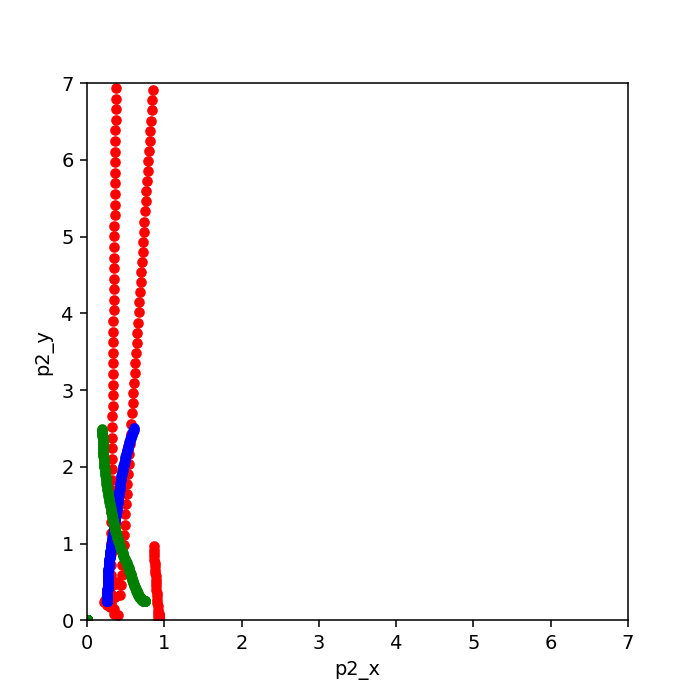

<IPython.core.display.Javascript object>


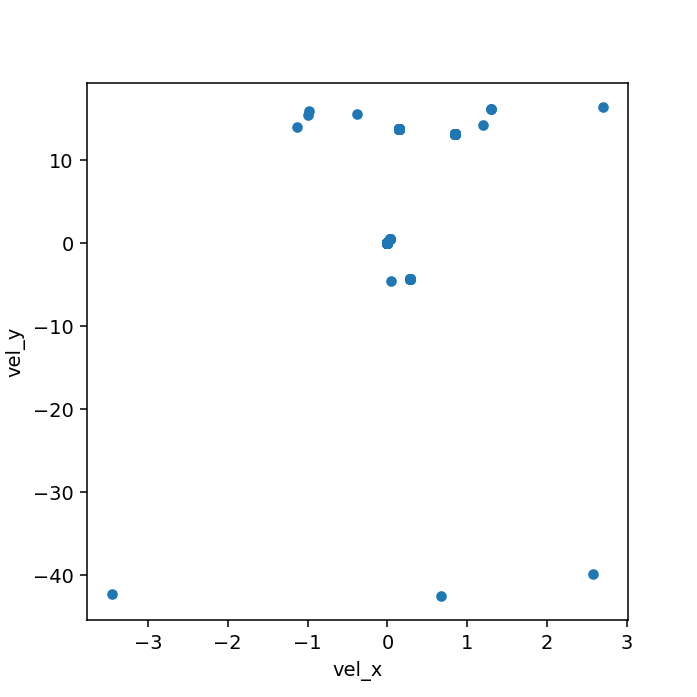

<IPython.core.display.Javascript object>


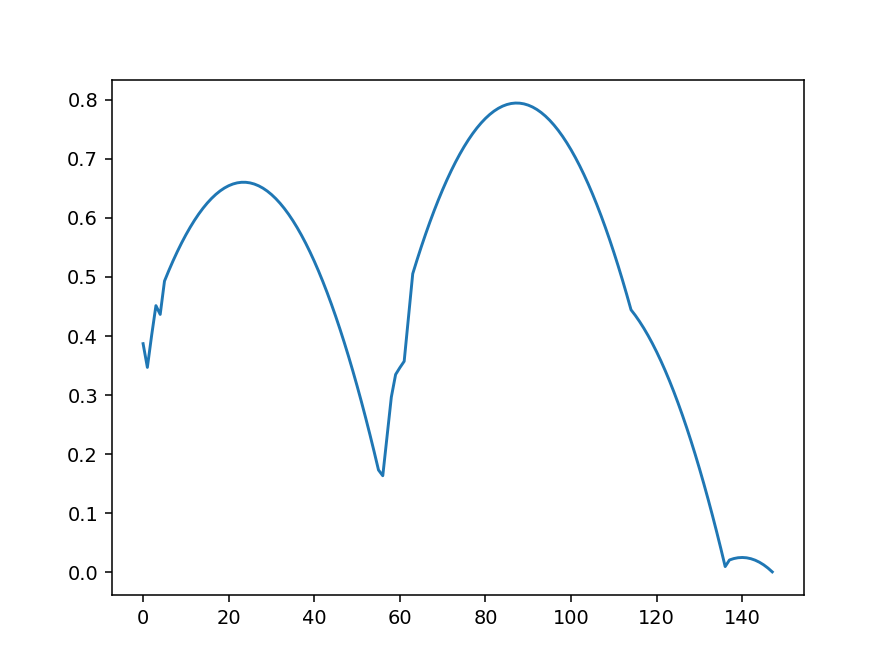

<IPython.core.display.Javascript object>


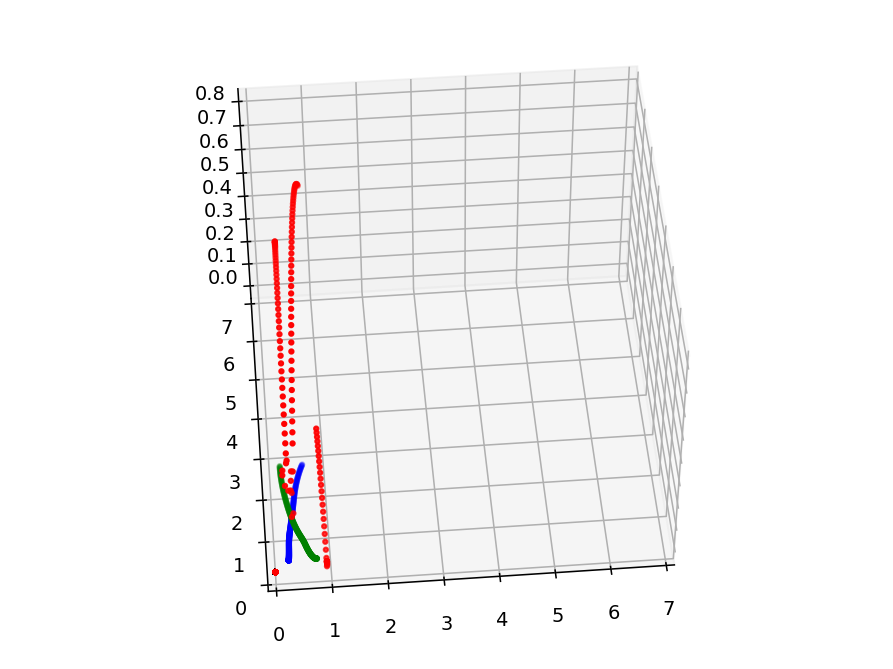

In [107]:
xyz_ball = np.zeros(3)
vel_ball = np.zeros(3)
mass_ball = 24 # between 23 and 25 grams
resilience = 0.33 # strength of rebound velocity after impact with wall or racquet

timesteps = 1000
time_factor = .01 # slow down time to observe movement

xyz_p1 = np.array([0.25, 0.25, 0])
xyz_p1[2] = 0

xyz_p2 = np.array([0.75, 0.25, 0])
xyz_p2[2] = 0

vel_p1 = np.zeros(3)
vel_p2 = np.zeros(3)

# mass_p1 = 100 * 1000 # weight in grams
# mass_p2 = 100 * 1000
accel_p1 = 3.51
accel_p2 = 3.51

reach_p1 = .5
reach_p2 = .5

g = -9.8 # gravitational acceleration

serve_side = np.random.randint(2)

court_size = 7

if serve_side == 0:
    print('serve left side')
#     xyz_ball[0] = np.random.rand() * 0.5
    xyz_ball = xyz_p1.copy()
    xyz_ball[2] = 0.3
else:
    print('serve right side')
#     xyz_ball[0] = np.random.rand() * 0.5 + 0.5
    xyz_ball = xyz_p2.copy()
    xyz_ball[2] = 0.3
    
# xyz_ball[1] = np.random.rand() * 0.5
# xyz_ball[2] = np.random.rand() * 2

# vel_ball = np.random.rand(2) * 2 - 1
vel_ball[1] = -44.7 + (np.random.rand() * 10 - 5)  # average serve speed plus or minus 5
vel_ball[0] = np.random.rand() * 20 - 10 #slighly side to side
vel_ball[2] = np.random.rand() * 20 - 5 # upward or slightly downward

xyzs_ball = np.zeros([timesteps, 3])
vels_ball = np.zeros([timesteps, 3])

xyzs_p1 = np.zeros([timesteps, 3])
vels_p1 = np.zeros([timesteps, 3])

xyzs_p2 = np.zeros([timesteps, 3])
vels_p2 = np.zeros([timesteps, 3])


num_zbounces = 0

for t in range(timesteps):
    
    vel_ball[2] += g * time_factor
    xyz_ball += vel_ball * time_factor
    
    xyz_ball, vel_ball, zbounce = calc_zbounce(xyz_ball, vel_ball, court_size)
    
    if zbounce:
        num_zbounces += 1
    
    if num_zbounces > 1:
        last_timestep = t
        break
    
    xyzs_ball[t] = xyz_ball
    vels_ball[t] = vel_ball
    
    # each player moves toward the ball
    dir_p1 = xyz_ball - xyz_p1
    dir_p2 = xyz_ball - xyz_p2
    
    # at a velocity accelerating toward the ball
    vel_p1 += time_factor * accel_p1 * dir_p1 / np.linalg.norm(dir_p1)
    vel_p2 += time_factor * accel_p1 * dir_p2 / np.linalg.norm(dir_p2)
    xyz_p1 += time_factor * vel_p1
    xyz_p2 += time_factor * vel_p2
    
    # keep players on the floor
    xyz_p1[2] = 0
    xyz_p2[2] = 0
    
    xyzs_p1[t] = xyz_p1
    xyzs_p2[t] = xyz_p2
    vels_p1[t] = vel_p1
    vels_p2[t] = vel_p2

    squared_dist_p1 = np.sum((xyz_p1-xyz_ball)**2)
    dist_p1 = np.sqrt(squared_dist_p1)
    
    squared_dist_p2 = np.sum((xyz_p2-xyz_ball)**2)
    dist_p2 = np.sqrt(squared_dist_p2)

    if dist_p1 < reach_p1 or dist_p2 < reach_p2:
        print('hit')
        num_zbounces = 0
        vel_ball[1] = -44.7 + (np.random.rand() * 10 - 5)  # average serve speed plus or minus 5
        vel_ball[0] = np.random.rand() * 20 - 10 #slighly side to side
        vel_ball[2] = np.random.rand() * 20 - 5 # upward or slightly downward
    
    
df_dynamics = pd.DataFrame(xyzs_ball)
df_dynamics.columns = ['x', 'y', 'z']
df_dynamics['vel_x'] = vels_ball[:,0]
df_dynamics['vel_y'] = vels_ball[:,1]
df_dynamics['vel_z'] = vels_ball[:,2]

df_p1_xyz = pd.DataFrame(xyzs_p1)
df_p1_xyz.columns = ['p1_x', 'p1_y', 'p1_z']

df_p2_xyz = pd.DataFrame(xyzs_p2)
df_p2_xyz.columns = ['p2_x', 'p2_y', 'p2_z']


df_dynamics = pd.concat([df_dynamics, df_p1_xyz, df_p2_xyz], axis=1)

fig, ax = plt.subplots()
df_dynamics.plot.scatter('x', 'y', figsize = [5,5], ax = ax, color = 'red');
df_dynamics.plot.scatter('p1_x', 'p1_y', ax = ax, color = 'blue')
df_dynamics.plot.scatter('p2_x', 'p2_y', ax = ax, color = 'green')
plt.xlim(0,court_size)
plt.ylim(0,court_size);

df_dynamics.plot.scatter('vel_x', 'vel_y', figsize = [5,5]);

plt.figure()
df_dynamics['z'].iloc[:last_timestep].plot();

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.xlim(0,court_size)
plt.ylim(0,court_size);
# ax.set_zlim(0,2)
ax.scatter3D(df_dynamics['x'], df_dynamics['y'], df_dynamics['z'], marker = '.', color = 'red');

ax.scatter3D(df_dynamics['p1_x'], df_dynamics['p1_y'], df_dynamics['p1_z'], marker = '.', color = 'blue');
ax.scatter3D(df_dynamics['p2_x'], df_dynamics['p2_y'], df_dynamics['p2_z'], marker = '.', color = 'green');
plt.tight_layout();


<IPython.core.display.Javascript object>


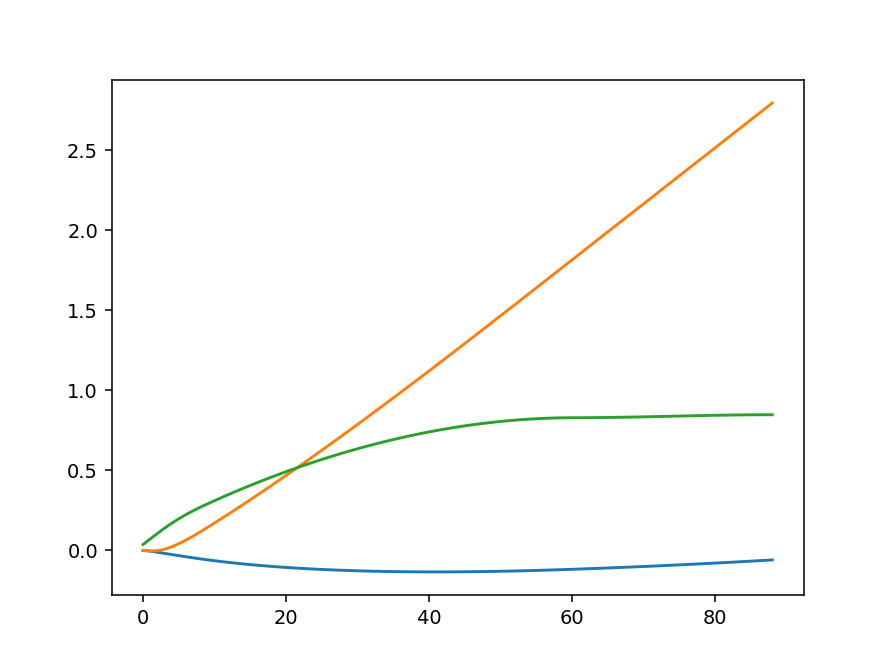

<IPython.core.display.Javascript object>


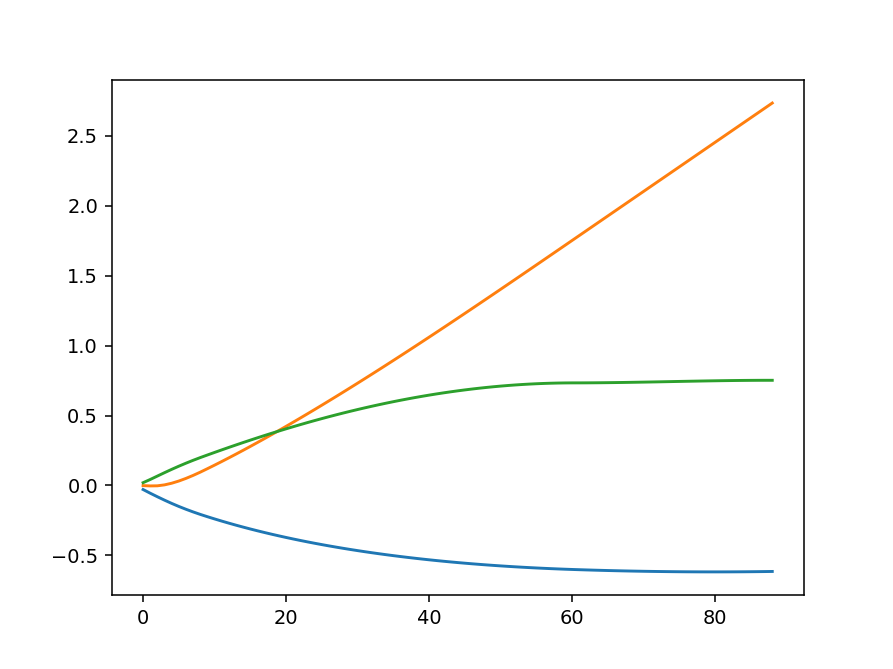

In [94]:
plt.figure()
plt.plot(vels_p1[:last_timestep]);

plt.figure()
plt.plot(vels_p2[:last_timestep]);

In [83]:
df_dynamics

,x,y,z,vel_x,vel_y,vel_z,p1_x,p1_y,p1_z,p2_x,p2_y,p2_z
0,0.315034,0.212157,0.425947,2.146135,15.251192,4.156266,0.250053,0.249969,0.0,0.749750,0.249978,0.0
1,0.336496,0.364669,0.466530,2.146135,15.251192,4.058266,0.250168,0.250021,0.0,0.749271,0.250020,0.0
2,0.357957,0.517181,0.506133,2.146135,15.251192,3.960266,0.250348,0.250234,0.0,0.748593,0.250197,0.0
3,0.379418,0.669693,0.544755,2.146135,15.251192,3.862266,0.250592,0.250657,0.0,0.747750,0.250563,0.0
4,0.400880,0.822205,0.582398,2.146135,15.251192,3.764266,0.250900,0.251322,0.0,0.746769,0.251155,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
